# Caso. Análisis de Costos Servicios de Salud

Para que una compañía de seguros gane dinero, necesita recaudar más en primas anuales de lo que gasta en atención médica para sus beneficiarios. Como resultado, las aseguradoras invierten una gran cantidad de tiempo y dinero para desarrollar modelos que pronostiquen con precisión los costos por servicios de salud.

En algunos casos los costos son difíciles de estimar porque las condiciones más costosas son raras y aparentemente aleatorias. Aún así, algunas condiciones son más frecuentes para ciertos segmentos de la población. Por ejemplo, el cáncer de pulmón es más probable entre los fumadores que los no fumadores, y la enfermedad cardíaca puede ser más probable entre los obesos.

El objetivo de este análisis es utilizar datos de pacientes para estimar los costos de atención médica para dichos segmentos de población. Estas estimaciones podrían usarse para crear tablas actuariales que fijen el precio de las primas anuales más o menos según los costos de tratamiento esperados.

# Librerías de Python y Carga de Datos

Los paquetes o librerías en python tienen incorporadas un conjunto de funciones de alto nivel que permiten manejar estructuras de datos, realizar cálculos matemáticos y estadísticos, generar gráficos, entre otras cosas. Las librerías que vamos utilizar en este módulo son:
- **pandas**: es un librería para el manejo de tablas de datos
* **numpy**: librería para el manejo de vector, matrices, arreglos. Además, traer incorporado una serie funciones para realizar cálculos matemáticos y estadístico
* **scipy**: incorpora una serie de funciones para cálculos matemáticos y estadísticos
* **seaborn**: es una librería de alto nivel para el desarrollo de gráficos en python
* **matplotlib**: es una librería para el desarrollo gráficos y sus respectivas capas de información

In [1]:
# Cargar librerías

# Librerías para el manejo de tablas (data frames)
import pandas as pd 

# Librerías para el manejo de arreglos y calculo matemático y estadístico
import numpy as np 
from scipy import stats 

# Librerís para visualización de datos
import matplotlib.pyplot as plt 
import seaborn as sns 

Despues de cargar las libreria ahora se procede a cargar los datos. Vamos a utilizar la función `pd.read_csv()` para cargar el archivo de datos. Dentro del parentesis se debe colocar la ruta donde esta ubicado el archivo.

In [2]:
datos = pd.read_csv('https://raw.githubusercontent.com/hfelizzola/Ruta-Data-Science-NuevaEPS/main/cargos-servicios-salud.csv')
datos.head()

,edad,sexo,imc,hijos,fumador,region,cargos
0,19,mujer,27.900,0,si,suroccidente,16884.92
1,18,hombre,33.770,1,no,suroriente,1725.55
2,28,hombre,33.000,3,no,suroriente,4449.46
3,33,hombre,22.705,0,no,noroccidente,21984.47
4,32,hombre,28.880,0,no,noroccidente,3866.86


El archivo [cargos-servicios-salud.csv](https://github.com/hfelizzola/Ruta-Data-Science-NuevaEPS/blob/main/cargos-servicios-salud.csv) incluye 1338 casos de beneficiarios actualmente inscritos en el plan de seguro, con variables que indican las características del paciente, así como los gastos médicos totales cargados al plan para el año calendario. Las características son:

- **edad**: es un número entero que indica la edad del beneficiario primario (excluyendo a los mayores de 64 años, ya que generalmente están cubiertos por el gobierno).
- **sexo**: este es el género del titular de la póliza, ya sea hombre o mujer.
- **imc**: este es el índice de masa corporal (body mass index - bmi), que proporciona una idea de cómo una persona con sobrepeso o bajo peso es relativa a su altura. El bmi es igual al peso (en kilogramos) dividido por la altura (en metros) al cuadrado. Un bmi ideal está dentro del rango de 18.5 a 24.9.
- **hijos**: este es un número entero que indica el número de hijos / dependientes cubiertos por el plan de seguro.
- **fumador**: Esto es sí o no, dependiendo de si el asegurado fuma regularmente.
- **region**: este es el lugar de residencia del beneficiario en los EE. UU., Dividido en cuatro regiones geográficas: noreste, sureste, suroeste o noroeste.
- **cargos**: costos médicos cargados al asegurado en el año calendario. Esta es la variable a predecir.

In [3]:
# Información general de la tabla de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     1338 non-null   int64  
 1   sexo     1338 non-null   object 
 2   imc      1338 non-null   float64
 3   hijos    1338 non-null   int64  
 4   fumador  1338 non-null   object 
 5   region   1338 non-null   object 
 6   cargos   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Análisis Exploratorio por Columna

Para desarrollar el análisis exploratorio vamos a utilizar los conceptos vistos en la sesión 1 sobre medidas estadísticas y gráficos.

## Cargos

Vamos a comenzar con la variable de interés que son los cargos (costos). Esta es una variable de tipo numérica por tanto vamos utilizar estadísticas como la media, mediana, desviación estándar, cuartiles, sesgo y curtosis para caracterizar la variable. Además, vamos a analizar la distribución utilizando histogramas y gráficos de caja.

### Histograma y gráfico de caja

- Histograma: `sns.histplot()`
- Gráfico de caja: `sns.boxplot()`

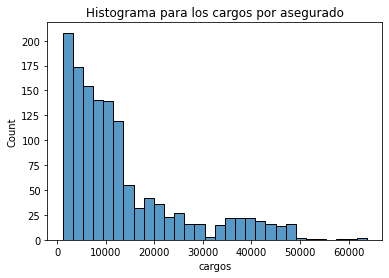

In [4]:
# Histograma
sns.histplot(data=datos, x='cargos') # Se configura el histograma
plt.title('Histograma para los cargos por asegurado') # Se agrega titulo al gráfico
plt.show() # Mostrar el gráfico

### Medidas de forma

* Sesgo: `stats.skew(columna, bias=False)`
* Curtosis: `stats.kurtosis(columna, fisher=False, bias=False)`

Para acceder a los datos de una columna, colocamos el nombre del objeto y entre corchetes el nombre de la columna:

In [5]:
datos['cargos']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.94
1337    29141.36
Name: cargos, Length: 1338, dtype: float64

In [6]:
stats.skew(datos['cargos'], bias=False)

1.5158796694851018

In [7]:
stats.kurtosis(datos['cargos'], fisher=False, bias=False)

4.606298669853668

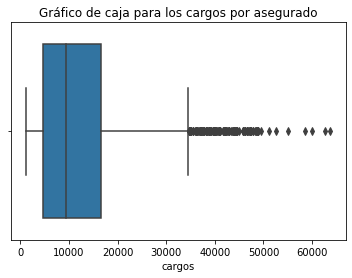

In [8]:
# Gráfico de caja
sns.boxplot(data=datos, x='cargos')
plt.title('Gráfico de caja para los cargos por asegurado')
plt.show()

### Medidas de tendencia central

* Media: `np.mean(columna)`
* Mediana: `np.median(columna)`
* Moda: `stats.mode(columna)`

In [9]:
# Media Aritmética
np.mean(datos['cargos'])

13270.422279521654

In [10]:
# Media Aritmética
np.median(datos['cargos'])

9382.029999999999

### Medidas de dispersión


* Rango: `np.max(columna) - np.min(columna)`
* Varianza: `np.var(columna, ddof=1)`
* Desviación estándar: `np.std(columna, ddof=1)`

In [11]:
# Rango
np.max(datos['cargos']) - np.min(datos['cargos'])

62648.56

In [12]:
# Varianza
np.var(datos['cargos'], ddof=1)

146652373.01644853

In [13]:
# Desviación estándar
np.std(datos['cargos'], ddof=1)

12110.011272350184

### Medidas de posición 

Para la calcular las medidas de forma se utiliza la función `np.quantile(datos, q=porcentaje)`

In [14]:
# Calcular los cuartiles Q1 -> 25%, Q2 -> 50%, Q3 -> 75%
np.quantile(datos['cargos'], q=[0.25, 0.50, 0.75])

array([ 4740.2875,  9382.03  , 16639.915 ])

En el resultados anterior los valores corresponden al primer, segundo y tercer cuartil respectivamente.

In [15]:
# Calcular los quintiles Q1 -> 20%, Q2 -> 40%, Q3 -> 60%, Q4 -> 80%
# interpolation='midpoint' utiliza el método usado en la presentación para calcular los quintiles y cuartiles, 
# basado en los puntos medios
np.quantile(datos['cargos'], q=[0.20, 0.40, 0.60, 0.80], interpolation='midpoint')

array([ 3992.01 ,  7364.975, 11404.29 , 20256.33 ])

In [16]:
# Percentiles
## Primero vamos a definir la secuencia de fracciones, esto evita e
ps = np.linspace(start=0.1, stop=0.9, num=9)
ps

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [17]:
np.quantile(datos['cargos'], q=ps)


array([ 2346.535,  3991.576,  5484.849,  7369.052,  9382.03 , 11399.856,
       13767.877, 20260.626, 34831.716])

A continuación, se presenta una función para realizar un resumen estadístico general de los datos.

In [18]:
datos['cargos'].describe()

count     1338.000000
mean     13270.422280
std      12110.011272
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: cargos, dtype: float64

## Edad

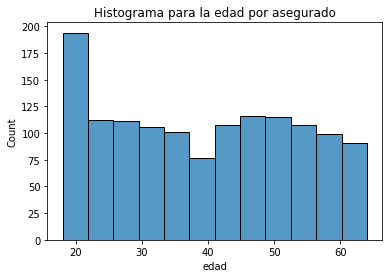

In [19]:
# Histograma
sns.histplot(data=datos, x='edad') 
plt.title('Histograma para la edad por asegurado') 
plt.show() 

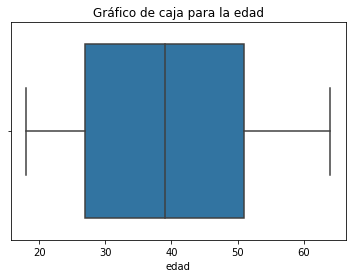

In [20]:
# Gráfico de caja
sns.boxplot(data=datos, x='edad')
plt.title('Gráfico de caja para la edad')
plt.show()

In [21]:
datos['edad'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: edad, dtype: float64

## Indice de masa corporal - IMC

Desarrolle el análisis exploratorio para el IMC

In [22]:
# Resumen estadístico: presente un resumen estadístico para el IMC


In [23]:
# Presente un histograma para el IMC


In [24]:
# Calcule las medidas de curtosis y sesgo para el IMC


In [25]:
# Presente un gráfico de caja para el IMC


## Sexo

Como el sexo es una variable categórica entonces vamos a presentar tabla de frecuencia y gráfico de barras.

In [26]:
# Frecuencia
datos.value_counts('sexo')

sexo
hombre    676
mujer     662
dtype: int64

In [27]:
# Proporciones
datos.value_counts('sexo')/datos.shape[0]

sexo
hombre    0.505232
mujer     0.494768
dtype: float64

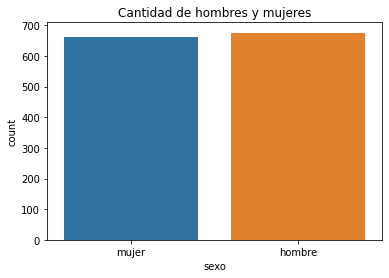

In [28]:
# Gráfico de barras
sns.countplot(data=datos, x='sexo')
plt.title('Cantidad de hombres y mujeres')
plt.show()

## Número de hijos

Si bien la variable numero de hijos es númerica, dado que es discreta se puede trabajar como una variable categórica.

In [29]:
# Tabla de frecuencia
datos.value_counts('hijos', sort=False)

hijos
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

In [30]:
# Proporciones
datos.value_counts('hijos', sort=False)/datos.shape[0]

hijos
0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
dtype: float64

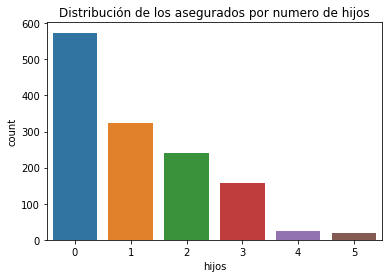

In [31]:
# Gráfico de barras
sns.countplot(data=datos, x='hijos')
plt.title('Distribución de los asegurados por numero de hijos')
plt.show()

## Fumador

Haga un análisis exploratorio para la variable fumador

In [32]:
# Frecuencia: calcule el numero de asegurados por su condición de furmador


In [33]:
# Proporciones: calcule la proporción de asegurados por su condición de furmador


In [34]:
# Gráfico de barras: haga un gráfico de barras que muestre como se distribuyen 
# los asegurados por su condición de fumador


## Región
Haga un análisis exploratorio para la variable región

In [35]:
# Frecuencia: calcule el numero de asegurados por región



In [36]:
# Proporciones: calcule la proporción de asegurados por región


In [37]:
# Gráfico de barras: haga un gráfico de barras que muestre como se distribuyen 
# los asegurados por su condición de fumador
